# **DNSC6315 Assignments**

We use Capital Bikeshare data for the analysis in DNSC6315 assignments.

### Read data from drive or local

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


ModuleNotFoundError: No module named 'google.colab'

In [2]:
import pandas as pd

# Correct Windows-style local paths
df_Feb = pd.read_csv("C:\\Users\\Kumar\\Downloads\\Data (1)\\Data\\202402-capitalbikeshare-tripdata.csv")
df_Mar = pd.read_csv("C:\\Users\\Kumar\\Downloads\\Data (1)\\Data\\202403-capitalbikeshare-tripdata.csv")
df_Apr = pd.read_csv("C:\\Users\\Kumar\\Downloads\\Data (1)\\Data\\202404-capitalbikeshare-tripdata.csv")

# concat data
df=pd.concat([df_Feb, df_Mar,df_Apr])

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


## Focus on GWSB Station: '22nd & H St NW'

### Bike Availability: Number of Pickups

In [4]:
# Convert the 'started_at' column to datetime objects
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date

# Filter for trips started at '22nd & H St NW'
PU_trips = df[df['start_station_name'] == '22nd & H St NW']

# Group by date and count the trips
PU_counts = PU_trips.groupby('started_at_date')['started_at_date'].count()

PU_counts

started_at_date
2024-02-01    33
2024-02-02    23
2024-02-03    22
2024-02-04    18
2024-02-05    19
              ..
2024-04-26    33
2024-04-27    18
2024-04-28    36
2024-04-29    37
2024-04-30    40
Name: started_at_date, Length: 90, dtype: int64

## Dock Availability: Number of Dropoffs

In [5]:
# Convert the 'ended_at' column to datetime objects
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

# Filter for trips ended at '22nd & H St NW'
DO_trips = df[df['end_station_name'] == '22nd & H St NW']

# Group by date and count the trips
DO_counts = DO_trips.groupby('ended_at_date')['ended_at_date'].count()

DO_counts

ended_at_date
2024-02-01    33
2024-02-02    25
2024-02-03    20
2024-02-04    19
2024-02-05    23
              ..
2024-04-26    39
2024-04-27    24
2024-04-28    28
2024-04-29    38
2024-04-30    39
Name: ended_at_date, Length: 90, dtype: int64

## Merge PU and DO tables
- For each day, we look at the numbers of pickups and dropoffs

In [6]:
# merge PU_counts and DO_counts by matching the dates, and change the column names to PU_count and DO_count respectively.

PU_DO_counts = pd.merge(PU_counts, DO_counts, left_index=True, right_index=True, how='outer')
PU_DO_counts = PU_DO_counts.rename(columns={'started_at_date': 'PU_ct', 'ended_at_date': 'DO_ct'})

# change the index name from 'started_at' to 'date'

PU_DO_counts = PU_DO_counts.rename_axis('date')
PU_DO_counts


,PU_ct,DO_ct
date,,
2024-02-01,33,33
2024-02-02,23,25
2024-02-03,22,20
2024-02-04,18,19
2024-02-05,19,23
...,...,...
2024-04-26,33,39
2024-04-27,18,24
2024-04-28,36,28


# Feature Information: Weather Data
- From https://www.visualcrossing.com/weather-history/

In [8]:
import pandas as pd

df_weather = pd.read_csv("C:\\Users\\Kumar\\Downloads\\Data (1)\\Data\\DC_weather_2024.csv")
df_weather.head()


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,...,0.9,1,10,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
1,"washington, dc",2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,...,8.3,5,10,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
2,"washington, dc",2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,...,9.6,5,10,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,D6279,72403793728,KADW,..."
3,"washington, dc",2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,...,4.8,4,10,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,KADW,KDAA,7..."
4,"washington, dc",2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,...,11.6,5,10,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,D6279,KADW,..."


## Drop variables of your choice

In [9]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge df_weather with PU_DO_counts

In [10]:
# Convert the 'datetime' column to datetime objects and extract the date
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['date'] = df_weather['datetime'].dt.date

# Merge the two dataframes based on the 'date' column
merged_df = pd.merge(PU_DO_counts, df_weather, on='date', how='left')

# Prepare training and test data

In [11]:
# we have two target variables: PU_ct and DO_ct
y = merged_df[['PU_ct','DO_ct']]
X = merged_df[['temp','precip','windspeed','uvindex','icon']]
X

,temp,precip,windspeed,uvindex,icon
0,42.4,0.000,12.0,5,partly-cloudy-day
1,47.1,0.012,19.1,2,rain
2,42.2,0.000,14.7,6,clear-day
3,41.7,0.000,9.2,6,clear-day
4,41.0,0.000,12.2,6,partly-cloudy-day
...,...,...,...,...,...
85,55.2,0.000,15.4,9,partly-cloudy-day
86,55.7,0.032,10.0,2,rain
87,67.0,0.000,10.0,9,partly-cloudy-day
88,75.2,0.000,13.0,9,partly-cloudy-day


## <font color="red"> Important: train_test_split with y=['PU_ct','DO_ct']. Why? <font>

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200) # 40% test data

# **Assignment 1: Classification Tree and Performance Evaluation**

### As we discussed in class, our intuition is to allocate more bikes if PU_ct > DO_ct; and less bikes if PU_ct < DO_ct. Thus, in this assignment, we want to predict whether PU_ct > DO_ct. We first create a new target variable to indicate whether PU_ct > DO_ct.

## <font color="red"> Additional Preprocessing Steps <font>

### Create categorical target variable 'Which_High' with classes {'PU_High','DO_High'}

In [13]:
# create a new variable to indicate if PU_ct > DO_ct in y_train and y_test
# create 'Which_High' with classes in string for plot_tree

y_train['PU_gt_DO'] = y_train['PU_ct'] > y_train['DO_ct']
y_train['Which_High'] = y_train['PU_gt_DO'].map({True: 'PU_High', False: 'DO_High'})

y_test['PU_gt_DO'] = y_test['PU_ct'] > y_test['DO_ct']
y_test['Which_High']=y_test['PU_gt_DO'].map({True: 'PU_High', False: 'DO_High'})


### Dummy encoding of categorical feature 'icon' before training

In [14]:
# get dummies in X_train_PU
X_train = pd.get_dummies(X_train, columns=['icon'], prefix='icon',drop_first=True)
# get dummies in X_test_PU
X_test = pd.get_dummies(X_test, columns=['icon'], prefix='icon',drop_first=True)

# Ensure both training and testing sets have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [15]:
X_train.head()

,temp,precip,windspeed,uvindex,icon_partly-cloudy-day,icon_rain,icon_snow
73,66.0,0.000,22.5,8,True,False,False
60,53.9,0.235,13.1,4,False,True,False
18,41.1,0.000,11.2,7,False,False,False
44,56.6,0.000,18.8,8,True,False,False
4,41.0,0.000,12.2,6,True,False,False


## <font color="red"> Task 1: </font> Train and visualize a classification tree with max_depth=3 for predicting 'Which_High' using 'entropy' as the criterion. [10 pts]

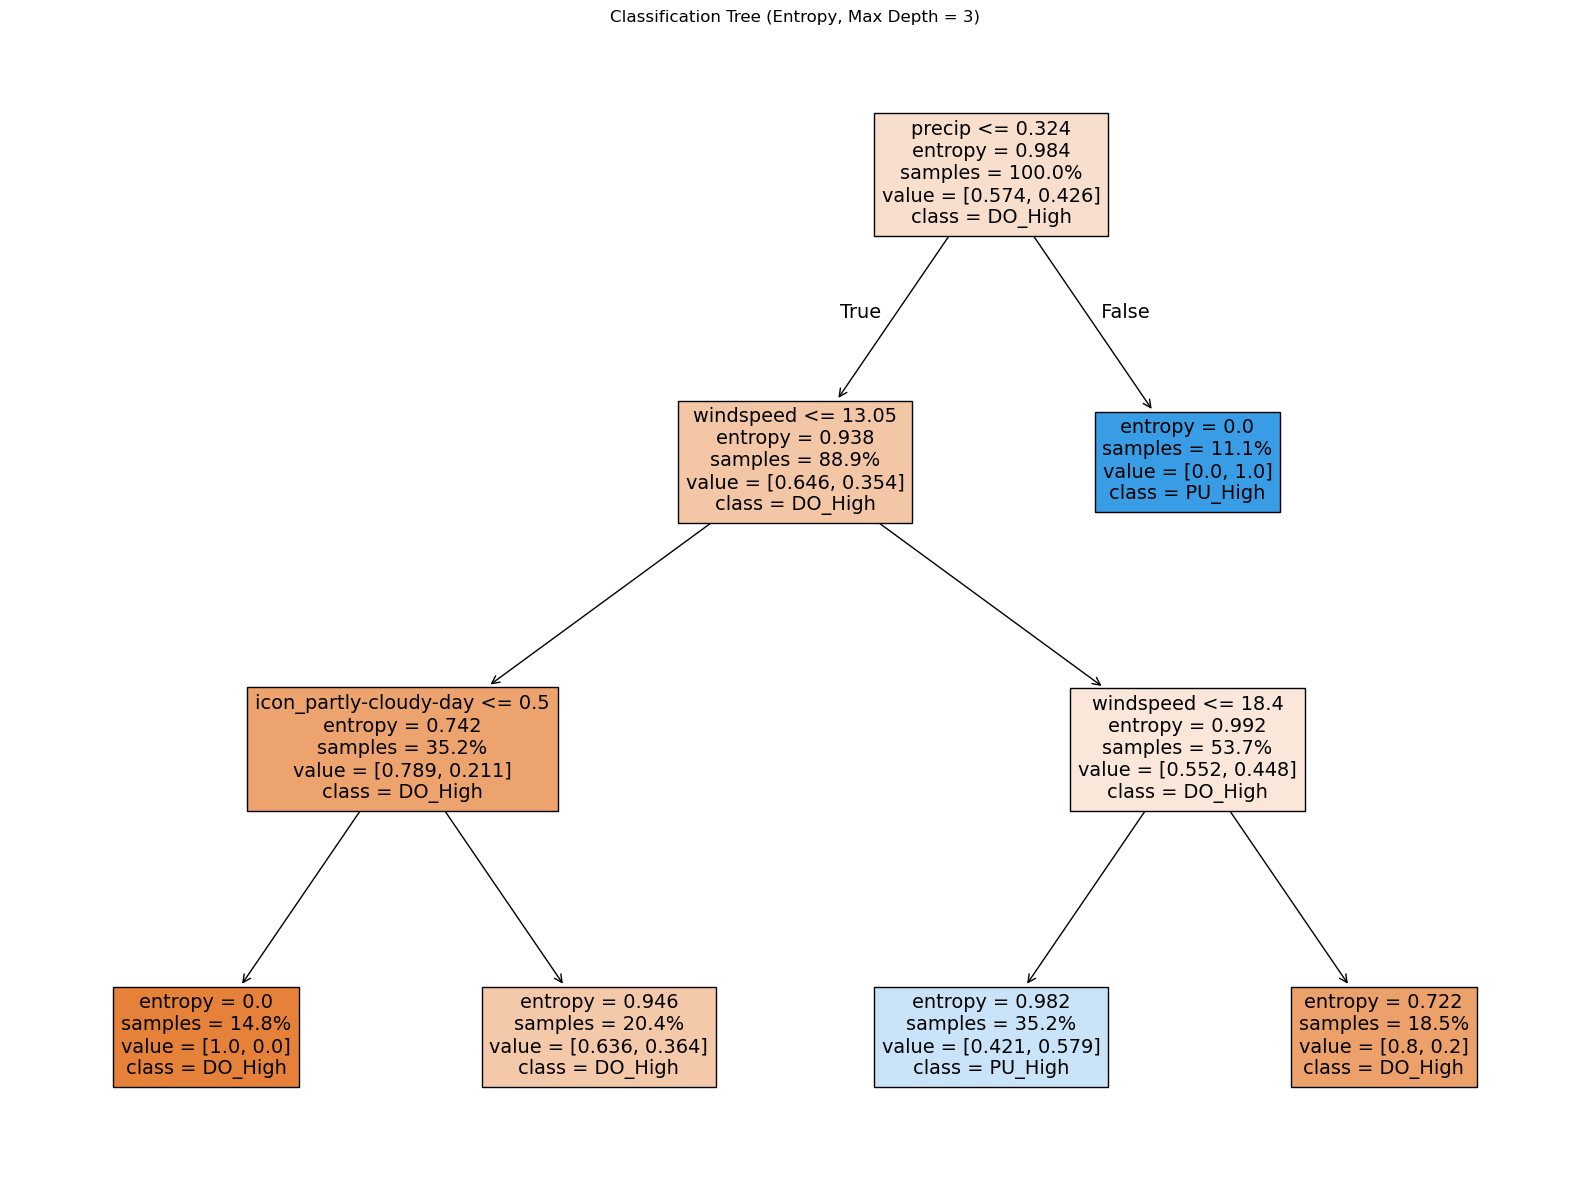

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train model
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
clf.fit(X_train, y_train['Which_High'])

# Visualize with best settings
plt.figure(figsize=(16, 12))
plot_tree(clf,
          feature_names=list(X_train.columns),
          class_names=list(clf.classes_),
          filled=True,
          proportion=True)
plt.title("Classification Tree (Entropy, Max Depth = 3)")
plt.tight_layout()
plt.show()


## <font color="red"> Task 2: </font> Pick the first sample in the test data and report its estimated probability of 'PU_High'. [10pts]

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Train the model (only if not already trained)
dtc_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
dtc_model.fit(X_train, y_train['Which_High'])

# Step 2: Predict class probabilities for the first test instance
y_prob = dtc_model.predict_proba(X_test.iloc[[0]])

# Step 3: Get index of 'PU_High' in class list
pu_index = list(dtc_model.classes_).index('PU_High')

# Step 4: Extract and report the estimated probability of 'PU_High'
pu_prob = y_prob[0][pu_index]
print(f"Estimated probability of 'PU_High' for the first test sample: {pu_prob:.4f}")




Estimated probability of 'PU_High' for the first test sample: 0.2000


## <font color="red"> Task 3: </font> Report the classification tree model's plain accuracy in the test data. [10pts]

In [22]:
from sklearn.metrics import accuracy_score

# Step 2: Predict on test data
y_pred = dtc_model.predict(X_test)

# Step 3: Calculate accuracy
accuracy = accuracy_score(y_test['Which_High'], y_pred)

# Step 4: Report accuracy
print(f"Classification tree accuracy on test data: {accuracy:.4f}")

Classification tree accuracy on test data: 0.5278


## <font color="red"> Task 4: </font> Show the confusion matrix of this classification tree in the test data [10 pts]

<Figure size 600x400 with 0 Axes>

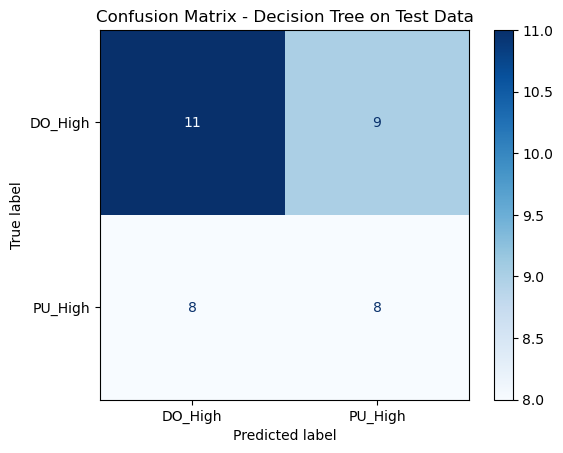

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Predict on test data (if not already done)
y_pred = dtc_model.predict(X_test)

# Step 2: Generate confusion matrix
cm = confusion_matrix(y_test['Which_High'], y_pred, labels=dtc_model.classes_)

# Step 3: Display it using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_model.classes_)

# Step 4: Plot
plt.figure(figsize=(6, 4))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Decision Tree on Test Data")
plt.grid(False)
plt.show()


## <font color="red"> Task 5: </font> Suppose we are interested in the class of 'DO_High' (i.e., we call it 'positive'). What are the true positive rate and the false positive rate of this classification tree? [10 pts]

In [25]:
from sklearn.metrics import confusion_matrix

# Step 1: Predict on test data
y_pred = dtc_model.predict(X_test)

# Step 2: Create confusion matrix with consistent label order
labels = ['DO_High', 'PU_High']  # DO_High is positive class
cm = confusion_matrix(y_test['Which_High'], y_pred, labels=labels)

# Step 3: Extract confusion matrix values
TP = cm[0, 0]  # True Positive: Predicted DO_High, actual DO_High
FN = cm[0, 1]  # False Negative: Predicted PU_High, actual DO_High
FP = cm[1, 0]  # False Positive: Predicted DO_High, actual PU_High
TN = cm[1, 1]  # True Negative: Predicted PU_High, actual PU_High

# Step 4: Calculate TPR and FPR
TPR = TP / (TP + FN) if (TP + FN) != 0 else 0
FPR = FP / (FP + TN) if (FP + TN) != 0 else 0

# Step 5: Print results
print(f"True Positive Rate (TPR) for 'DO_High': {TPR:.4f}")
print(f"False Positive Rate (FPR) for 'DO_High': {FPR:.4f}")


True Positive Rate (TPR) for 'DO_High': 0.5500
False Positive Rate (FPR) for 'DO_High': 0.5000


## <font color="red"> Task 6: </font> Follow the sample code in 'Lec 2 ClassificationPerformance', compare the following methods by AUC evaluated under 5-fold cross-validation. [20 pts]
- Linear SVM, i.e., SVC(kernel = 'linear')
- KNN with K=10
- DecisionTreeClassifier(max_depth=3,criterion = 'entropy', random_state=0)


In [29]:
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Define models
models = [
    ('Linear SVM', SVC(kernel='linear', probability=True, random_state=0)),
    ('KNN (k=10)', KNeighborsClassifier(n_neighbors=10)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=3, criterion='entropy', random_state=0))
]

# Initialize results list
results_list = []

# Set up 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
auc_scorer = make_scorer(roc_auc_score, response_method='predict_proba')

# Loop through models and collect performance
for name, model in models:
    cv_auc = cross_val_score(model, X_train, y_train['Which_High'], cv=kf, scoring=auc_scorer)
    cv_acc = cross_val_score(model, X_train, y_train['Which_High'], cv=kf, scoring='accuracy')

    results_list.append({
        'Algorithm': name,
        'AUC Mean': round(cv_auc.mean() * 100, 2),
        'AUC STD': round(cv_auc.std() * 100, 2),
        'Accuracy Mean': round(cv_acc.mean() * 100, 2),
        'Accuracy STD': round(cv_acc.std() * 100, 2),
        'AUC Scores (per fold)': [round(score, 4) for score in cv_auc]
    })

# Create and display results table
results_df = pd.DataFrame(results_list)
results_df = results_df.sort_values(by='AUC Mean', ascending=False)

# Print complete DataFrame
pd.set_option('display.max_colwidth', None)
print(results_df)


       Algorithm  AUC Mean  AUC STD  Accuracy Mean  Accuracy STD  \
1     KNN (k=10)     50.17    20.99          53.45         19.70   
2  Decision Tree     36.58    13.88          51.82         13.36   
0     Linear SVM     27.67     4.67          50.36         13.98   

                      AUC Scores (per fold)  
1  [0.6833, 0.2833, 0.4167, 0.8125, 0.3125]  
2     [0.5167, 0.2833, 0.3833, 0.1458, 0.5]  
0    [0.2333, 0.3333, 0.2333, 0.3333, 0.25]  


## <font color="red"> Task 7: </font> After selecting the best model, report its final out-of-sample performance measured by AUC. [10 pts]

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Train the best model (Linear SVM) on the full training set
best_model = SVC(kernel='linear', probability=True, random_state=0)
best_model.fit(X_train, y_train['Which_High'])

# Predict using decision_function (since SVC returns distances, not probabilities by default)
y_pred_prob = best_model.decision_function(X_test)

# Calculate final AUC on out-of-sample test set
final_auc = roc_auc_score(y_test['Which_High'], y_pred_prob)

# Print formatted output
print(f"Best Model: SVC (Linear Kernel)")
print(f"Final Out-of-Sample AUC: {final_auc * 100:.2f}%")



Best Model: SVC (Linear Kernel)
Final Out-of-Sample AUC: 38.75%
